In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=0d1f4fba4b5a0721d5cfc8b8d15b3708d9cc9105a85f7b5f3a5cb87057aa0b75
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
/kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
/kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z


In [3]:
!apt-get install p7zip
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-7build1).
p7zip set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/mercari-price-suggestion-challenge                                                          1 file, 77912192 bytes (75 MiB)

Extracting archive: /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
--
Path = /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      2% - train.t                6% - train.t                9% - train.t               12% - train.t               16% 

#   Bibliotecas

In [4]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack #utilizada para a junção de matrizes

In [5]:
#Pré processamento de colunas

from sklearn.model_selection import train_test_split #Divisão do dataset entre treino e teste
from sklearn.feature_extraction.text import TfidfVectorizer #vetorização do dataset
from sklearn.preprocessing import OneHotEncoder #aplicação de dummy

In [6]:
#Pré processamento de texto

import nltk
from nltk import word_tokenize #tokenizador
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords   #stopword

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Modelo a ser testado

from keras.layers import Input, Dense
from keras.models import Model

In [8]:
#metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [9]:
#import de funções do arquivo pre_processamento

from pre_processamento import pre_processamento, text_preprocess, textcolumns_junct,stemming

In [10]:
# Modelo a ser testado
import tensorflow as tf
from keras import layers
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.utils import plot_model

In [11]:
#metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [12]:
# train = pd.read_pickle("train.pkl") 
train = pd.read_csv('train.tsv', sep = '\t')
test = pd.read_csv('test.tsv', sep = '\t')

In [13]:
train,test = pre_processamento(train,test)

#   Split

In [14]:
X1, Xtest = train_test_split(train, test_size=0.1, random_state=10) #Divisão em 90/10

In [15]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval = train_test_split(X1, test_size=0.2, random_state=10) #Divisão em 80/20

In [16]:
# ytrain = Xtrain['price']
# yval = Xval['price']
# ytest = Xtest['price']

# Xtrain = Xtrain.drop('price', axis = 1)
# Xval = Xval.drop('price', axis = 1)
# Xtest = Xtest.drop('price', axis = 1)

In [17]:
print(Xtrain.shape) 
print(Xval.shape)
print(Xtest.shape)

(1066795, 13)
(266699, 13)
(148167, 13)


#   Pré-processamento 

In [18]:
#Função pra juntar as colunas de texto em uma só coluna

Xtrain = textcolumns_junct(Xtrain) 
Xval = textcolumns_junct(Xval) 
Xtest = textcolumns_junct(Xtest) 

In [19]:
#Convertendo tudo para string

Xtrain["item_description"] = Xtrain["item_description"].astype(str)
Xval["item_description"] = Xval["item_description"].astype(str)
Xtest["item_description"] = Xtest["item_description"].astype(str)

In [20]:
#Limpando texto com regex.
Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: text_preprocess(x))
Xval["item_description"] = Xval["item_description"].apply(lambda x: text_preprocess(x))
Xtest["item_description"] = Xtest["item_description"].apply(lambda x: text_preprocess(x))

In [21]:
# #tokenizando

Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: word_tokenize(x))
Xval["item_description"] = Xval["item_description"].apply(lambda x: word_tokenize(x))
Xtest["item_description"] = Xtest["item_description"].apply(lambda x: word_tokenize(x))

In [22]:
Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: stemming(x))
Xval["item_description"] = Xval["item_description"].apply(lambda x: stemming(x))
Xtest["item_description"] = Xtest["item_description"].apply(lambda x: stemming(x))

In [23]:
Xtrain["item_description"]=[" ".join(review) for review in Xtrain["item_description"].values]
Xval["item_description"]=[" ".join(review) for review in Xval["item_description"].values]
Xtest["item_description"]=[" ".join(review) for review in Xtest["item_description"].values]

In [24]:
Xtrain.to_pickle(r"Xtrain.pkl")
Xval.to_pickle(r"Xval.pkl")
Xtest.to_pickle(r"Xtest.pkl")

In [25]:
# Xtrain = pd.read_pickle(r"Xtrain.pkl")
# Xval = pd.read_pickle(r"Xval.pkl") 
# Xtest = pd.read_pickle(r"Xtest.pkl") 

In [26]:
#treinando o modelo com valores até $250, que representam 89% do dataset
Xtrain = Xtrain.drop(Xtrain[~((Xtrain['price'] > 0) & (Xtrain['price'] <= 250))].index)
Xval = Xval.drop(Xval[~((Xval['price'] > 0) & (Xval['price'] <= 250))].index)
Xtest = Xtest.drop(Xtest[~((Xtest['price'] > 0) & (Xtest['price'] <= 250))].index)

In [27]:
Xtrain.head()

,item_condition_id,category_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
743320,1,Beauty/Makeup/Face,25.0,1,new face sweetheart blush bronzer face face bu...,11,Beauty,Makeup,Face,1.0,2018.0
313184,1,Vintage & Collectibles/Supplies/Fabric,16.0,1,bundl 6 red ish fabric clearanc size vari 1 ya...,15,Vintage & Collectibles,Supplies,Fabric,10.0,2018.0
1367929,1,Men/Men's Accessories/Hats,35.0,1,suprem camo facemask suprem brand new free shi...,4,Men,Men's Accessories,Hats,4.0,2018.0
41968,1,Beauty/Makeup/Makeup Sets,27.0,1,ipsi bag makeup brush sephora ipsi cosmet bag ...,19,Beauty,Makeup,Makeup Sets,11.0,2018.0
633793,1,Women/Swimwear/One-Piece,139.0,0,new acacia bronx one piec heliconia acacia swi...,17,Women,Swimwear,One-Piece,9.0,2018.0


In [28]:
ytrain = Xtrain["price"]
ytrain = np.log1p(ytrain)
Xtrain = Xtrain.drop("price", axis=1)
Xtrain.shape

(1062337, 10)

In [29]:
yval= Xval["price"]
Xval = Xval.drop("price", axis = 1)
Xval.shape

(265615, 10)

In [30]:
ytest = Xtest["price"]
Xtest = Xtest.drop("price", axis = 1)
Xtest.shape

(147582, 10)

# Transformadores

In [31]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df = 50, max_df = 0.5) #vetorização, com stop word. 

In [32]:
vec_train = vec.fit_transform(Xtrain["item_description"])

vec_train

<1062337x59395 sparse matrix of type '<class 'numpy.float64'>'
	with 27316203 stored elements in Compressed Sparse Row format>

In [33]:
vec_val = vec.transform(Xval["item_description"])

vec_val

<265615x59395 sparse matrix of type '<class 'numpy.float64'>'
	with 6815904 stored elements in Compressed Sparse Row format>

In [34]:
ohe = OneHotEncoder(handle_unknown="ignore")

#aplicação dummy nas colunas categóricas.

ohe_train = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat"]])
                                         #"datetime_month"]])
                            
ohe_train

<1062337x988 sparse matrix of type '<class 'numpy.float64'>'
	with 5311685 stored elements in Compressed Sparse Row format>

In [35]:
ohe_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat"]]) 
                                         #"datetime_month"]])

ohe_val

<265615x988 sparse matrix of type '<class 'numpy.float64'>'
	with 1328064 stored elements in Compressed Sparse Row format>

In [36]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vec_train),
                 (ohe_train)
                 	
                                     ],format='csr') 
x_train

<1062337x60383 sparse matrix of type '<class 'numpy.float64'>'
	with 32627888 stored elements in Compressed Sparse Row format>

In [37]:
x_val = hstack([
                 (vec_val),
                 (ohe_val),
                             ], format='csr') 
x_val

<265615x60383 sparse matrix of type '<class 'numpy.float64'>'
	with 8143968 stored elements in Compressed Sparse Row format>

# Modelo

In [38]:
from tensorflow.keras.backend import clear_session

clear_session()

In [39]:
from keras.layers import Input, Dense, Reshape, Conv1D, BatchNormalization, Activation, Flatten, AveragePooling1D, MaxPooling1D
from keras.models import Model

input = Input(shape=(x_train.shape[-1]), sparse=True, name='sparse')
dense3 = Dense(1024, activation="PReLU") (input)
dense4 = Dense(512, activation="PReLU") (dense3)
reshape1 = Reshape((512,1)) (dense4)

conv1 = Conv1D(16,2,activation='PReLU') (reshape1)
act1 = Activation('PReLU') (conv1)
pool1 = MaxPooling1D() (act1)
flat1 = Flatten() (pool1)

dense5 = Dense(256, activation="PReLU") (flat1)

dense6 = Dense(128, activation="PReLU") (dense5)
out = Dense(1, activation='PReLU') (dense6)

model = Model(inputs = input, outputs = out)

model.summary()

#Tentar dropar os bundles

2022-11-03 23:44:57.123990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 23:44:57.234966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 23:44:57.235956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sparse (InputLayer)          [(None, 60383)]           0         
_________________________________________________________________
dense (Dense)                (None, 1024)              61834240  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               525312    
_________________________________________________________________
reshape (Reshape)            (None, 512, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 511, 16)           8224      
_________________________________________________________________
activation (Activation)      (None, 511, 16)           8176      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 255, 16)           0     

2022-11-03 23:44:57.238106: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 23:44:57.238440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 23:44:57.239250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 23:44:57.239977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [40]:
ytrain.values.shape

(1062337,)

In [41]:
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model.compile(loss="mean_absolute_error", metrics=['mean_squared_error', 'mean_squared_logarithmic_error', RootMeanSquaredError()], optimizer = Adam(learning_rate = 0.0005))
history1 = model.fit(x_train, ytrain.values, batch_size=1024, epochs=30, verbose=True, shuffle = True)

2022-11-03 23:45:00.702263: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 522046208 exceeds 10% of free system memory.
2022-11-03 23:45:01.464926: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 522046208 exceeds 10% of free system memory.


Epoch 1/30


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 1024), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
2022-11-03 23:45:04.654167: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-03 23:45:09.356349: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1038/1038 [==============================] - 48s 36ms/step - loss: 0.3794 - mean_squared_error: 0.2867 - mean_squared_logarithmic_error: 0.0239 - root_mean_squared_error: 0.5355
Epoch 2/30
1038/1038 [==============================] - 38s 35ms/step - loss: 0.3068 - mean_squared_error: 0.1738 - mean_squared_logarithmic_error: 0.0110 - root_mean_squared_error: 0.4169
Epoch 3/30
1038/1038 [==============================] - 38s 35ms/step - loss: 0.2635 - mean_squared_error: 0.1352 - mean_squared_logarithmic_error: 0.0085 - root_mean_squared_error: 0.3677
Epoch 4/30
1038/1038 [==============================] - 38s 35ms/step - loss: 0.2251 - mean_squared_error: 0.1034 - mean_squared_logarithmic_error: 0.0065 - root_mean_squared_error: 0.3215
Epoch 5/30
1038/1038 [==============================] - 39s 35ms/step - loss: 0.1950 - mean_squared_error: 0.0807 - mean_squared_logarithmic_error: 0.0050 - root_mean_squared_error: 0.2841
Epoch 6/30
1038/1038 [==============================] - 38s 35ms/s

In [42]:
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [43]:
y_pred = np.expm1(model.predict(x_val))
ytrue = yval

print(mean_absolute_error(yval,y_pred))
print(mean_squared_error(yval,y_pred))
print(mean_squared_log_error(yval,y_pred))

8.72796997765206
291.6424864488566
0.1930177859544514


<AxesSubplot:xlabel='price'>

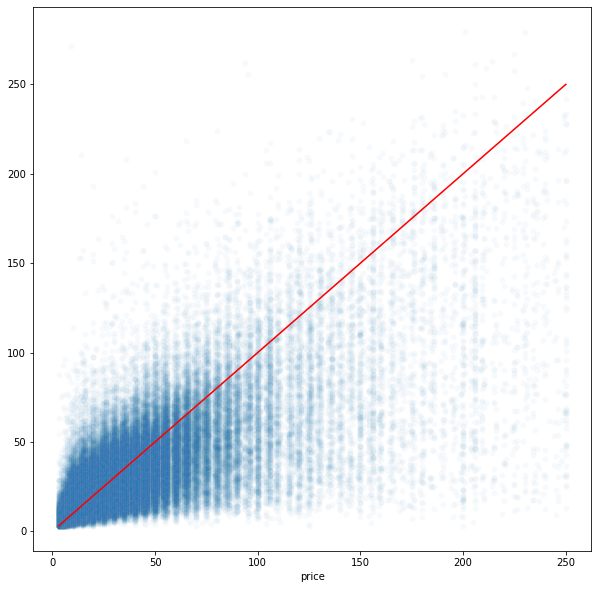

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x=ytrue, y=[i[0] for i in y_pred.tolist()], alpha=0.03)

sns.lineplot(x=ytrue.values, y=ytrue.values, color='red')

In [47]:
y_pred = np.expm1(model.predict(x_train))
ytrue = np.expm1(ytrain)

print(mean_absolute_error(ytrue,y_pred))
print(mean_squared_error(ytrue,y_pred))
print(mean_squared_log_error(ytrue,y_pred))

2022-11-04 00:07:57.376770: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 522046208 exceeds 10% of free system memory.


1.7187339083809836
16.74355778622542
0.008486502325006676


<AxesSubplot:xlabel='price', ylabel='price'>

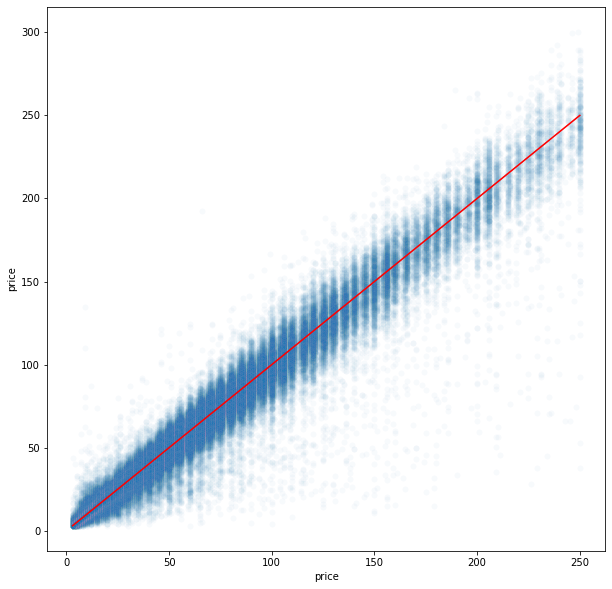

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x=ytrue, y=[i[0] for i in y_pred.tolist()], alpha=0.03)

sns.lineplot(x=ytrue, y=ytrue, color='red')